<p><a href="https://www.asu.edu.eg/"><img align="right" src="https://scontent.fcai22-1.fna.fbcdn.net/v/t39.30808-6/319422102_552367060236263_7422300774427078391_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=09cbfe&_nc_ohc=zwABgo9bkI4AX8005Ad&_nc_ht=scontent.fcai22-1.fna&oh=00_AfCGVrthCNGu0oIHW_rcZaZFjs-LQFm2WeXUZIlMsYziBg&oe=64EBB00D" width="220" /></a></p>
<div style="font-family:Georgia;color:black;font-size:120%;text-align:left;">
<h1 style="color: blue";>
  English Sign Language Alphabet Classification
</h1>
<h3>
    The Second Notebook <br> CNN Model
</h3>
    <h6>
        The final project of the computer vision summer training held by ApplAI
    </h6>
    <h6>
        &copy; 2023 <a href="https://aliabdallah7.github.io/My-Portfolio/" style="color: #00abf0;">Ali Abdallah</a>
    </h6>
    <br>
<br>
</div>

<p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:150%;text-align:center;border-radius:20px 40px;">Table Of Contents</p>   
    
* [1. Importing Modules](#1)
    
* [2. Loading Data and Convert it to pandas dataframe](#2)
    
* [3. Data Augmentation](#3) 

* [4. Model Creation and Training](#4) 
      
* [5. Model Visualization](#5)

* [6. Prediction](#6)


<a id="1"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Importing Modules</p>

In [16]:
import numpy as np
import pandas as pd
import os
import cv2                  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pickle

<a id="2"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Loading Data and Convert it to pandas dataframe</p>

> **Create the path as the variable and run a loop for all the folders. Create a dictionary of the paths with keys as the labels and convert it to pandas dataframe**

In [4]:
train_folder = './data/train'
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    #print(onlyfiles)
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df

,label,path
0,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
1,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
2,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
3,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
4,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
...,...,...
86995,J,/kaggle/input/asl-alphabet/asl_alphabet_train/...
86996,J,/kaggle/input/asl-alphabet/asl_alphabet_train/...
86997,J,/kaggle/input/asl-alphabet/asl_alphabet_train/...
86998,J,/kaggle/input/asl-alphabet/asl_alphabet_train/...


> **Create a holdout and validation subset from the data. Holdout will be used at the end to evaluate our model.**

In [5]:
x_train,x_holdout = train_test_split(data_df, test_size= 0.10, random_state=42,stratify=data_df[['label']])
x_train,x_test = train_test_split(x_train, test_size= 0.25, random_state=42,stratify=x_train[['label']])

<a id="3"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Data Augmentation</p>

In this section of the code, we set up data augmentation and data generators for training, validation, and holdout datasets. These generators are essential for efficiently feeding data into a deep learning model during training and evaluation.

### Code Explanation

- `img_width, img_height = 64, 64`: We define the dimensions to which all images will be resized during preprocessing.

- `batch_size = 256`: We specify the batch size, which determines the number of images processed in each training iteration.

- `y_col = 'label'` and `x_col = 'path'`: We specify the column names in the DataFrame (`data_df`) where labels and file paths are stored.

- `no_of_classes = len(data_df[y_col].unique())`: We calculate the number of unique classes (sign language gestures) in the dataset. This is used for defining the output layer of the deep learning model.

### Data Augmentation and Generators

- `ImageDataGenerator`: We create instances of the `ImageDataGenerator` class from a library like Keras. This class is used for data augmentation and preprocessing.

- `rescale = 1/255.0`: We rescale the pixel values of the images to a range between 0 and 1, which is a common preprocessing step for neural networks.

- `train_generator`, `validation_generator`, and `holdout_generator`: We create data generators for the training, validation, and holdout datasets using the `flow_from_dataframe` method. These generators read image data from the DataFrame and apply preprocessing and data augmentation as specified.

  - `dataframe`: The DataFrame containing image information.
  - `x_col`: The column in the DataFrame that contains file paths to the images.
  - `y_col`: The column in the DataFrame that contains class labels.
  - `target_size`: The dimensions to which images are resized.
  - `class_mode`: We specify that class labels are categorical.
  - `batch_size`: The number of images in each batch.
  - `shuffle`: We set `shuffle` to `False` to ensure that data ordering is consistent for training, validation, and holdout sets.

### Purpose

The purpose of this code section is to set up data generators for efficiently processing image data during deep learning model training and evaluation. Data augmentation and preprocessing techniques help improve model generalization, and the generators allow us to handle large datasets without loading them entirely into memory. This is crucial for training deep learning models on image data effectively.


In [6]:
img_width, img_height = 64, 64
batch_size = 256
y_col = 'label'
x_col = 'path'
no_of_classes = len(data_df[y_col].unique())


train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height),class_mode='categorical', batch_size=batch_size,
    shuffle=False,
)

validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=x_test, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

holdout_datagen = ImageDataGenerator(rescale = 1/255.0)
holdout_generator = holdout_datagen.flow_from_dataframe(
    dataframe=x_holdout, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

Found 58725 validated image filenames belonging to 29 classes.
Found 19575 validated image filenames belonging to 29 classes.
Found 8700 validated image filenames belonging to 29 classes.


<a id="4"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Basic CNN Model</p>

In this section of the code, we define the architecture of a Convolutional Neural Network (CNN) model for sign language detection. CNNs are commonly used for image classification tasks due to their ability to capture spatial features in images.

### Code Explanation

- `model = Sequential()`: We create a sequential model, which allows us to build the neural network layer by layer in a linear fashion.

- Convolutional Layers:
  - `Conv2D(32, (5,5), padding='Same', activation='relu', input_shape=(64, 64, 3))`: We add the first convolutional layer with 32 filters, a kernel size of (5, 5), 'same' padding, and ReLU activation function. The `input_shape` specifies the dimensions of the input images.
  - `MaxPooling2D(pool_size=(2,2), strides=(2,2))`: We apply max-pooling with a pool size of (2, 2) and stride of (2, 2) to reduce spatial dimensions.
  - `Dropout(0.3)`: We add dropout regularization to prevent overfitting by randomly dropping 30% of the neurons.

- The above pattern is repeated for additional convolutional layers (64, 64, and 128 filters) with max-pooling and dropout after each layer.

- `Flatten()`: We flatten the output from the convolutional layers to prepare it for the fully connected layers.

- Fully Connected Layers:
  - `Dense(256)`: We add a dense layer with 256 units.
  - `Activation('relu')`: We apply ReLU activation to the output of the dense layer.
  - `Dense(29, activation="softmax")`: Finally, we add the output layer with 29 units (assuming 29 sign language gestures to classify) and use softmax activation to produce class probabilities.

### Purpose

The purpose of this code section is to define the architecture of a CNN model for sign language detection. CNNs are effective for image-based classification tasks as they can automatically learn and extract features from images. The network consists of convolutional layers for feature extraction, max-pooling layers for spatial reduction, and fully connected layers for classification. Dropout is used for regularization to improve model generalization and prevent overfitting.

This CNN architecture is designed to learn and classify sign language gestures from input images.


In [7]:
model = Sequential()

model.add(Conv2D(32, (5,5),padding = 'Same',activation ='relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(29, activation = "softmax"))

In this section of the code, we compile the previously defined Convolutional Neural Network (CNN) model and provide an overview of the model's architecture and configuration.

### Code Explanation

- `model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])`: We compile the CNN model with the following settings:
  - `optimizer=Adam(learning_rate=0.001)`: We use the Adam optimizer with a learning rate of 0.001. Adam is a popular optimization algorithm used for training deep neural networks.
  - `loss='categorical_crossentropy'`: We specify the loss function as categorical cross-entropy. This loss is commonly used for multiclass classification problems like sign language detection.
  - `metrics=['accuracy']`: We specify that we want to track and report the accuracy metric during model training.

- `model.summary()`: We generate a summary of the model's architecture, which provides a concise overview of the layers, output shapes, and trainable parameters in the model.

### Purpose

The purpose of this code section is to configure the model for training. Compilation involves specifying the optimizer, loss function, and metrics that will be used during the training process. The model summary provides a high-level view of the model's structure, making it easier to verify the architecture and understand the complexity of the neural network.

With the model compiled and summarized, it is ready to be trained on the sign language detection dataset.


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In this section of the code, we train the previously defined Convolutional Neural Network (CNN) model on the sign language detection dataset. Additionally, we employ early stopping to monitor the validation loss and stop training if it doesn't improve over a specified number of epochs.

### Code Explanation

- `early_stop = EarlyStopping(monitor='val_loss', patience=5)`: We create an instance of the `EarlyStopping` callback. This callback is used to monitor the validation loss (`'val_loss'`) and stop training if it doesn't improve for a specified number of epochs (in this case, 5).

- `history = model.fit(...)`: We initiate the training process using the `fit` method of the model. The key parameters include:
  - `train_generator`: The data generator for training.
  - `epochs=20`: We specify the number of training epochs, which is set to 20.
  - `verbose=1`: We set the verbosity to 1 to display training progress.
  - `validation_data=validation_generator`: We use the validation data generator for monitoring model performance during training.
  - `callbacks=[early_stop]`: We provide the `early_stop` callback to monitor and control early stopping based on validation loss.

### Purpose

The purpose of this code section is to train the CNN model on the sign language detection dataset while monitoring validation loss. Early stopping is employed to prevent overfitting and to halt training if the model's performance on the validation data plateaus or deteriorates. This technique helps ensure that the model does not continue to learn noise in the data and generalizes well to new, unseen examples.

The `history` variable will contain training and validation metrics, which can be used for further analysis and visualization of model performance.


In [9]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks = [early_stop])

Epoch 1/20


2023-09-01 21:02:18.569163: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


230/230 [==============================] - 596s 3s/step - loss: 2.1716 - accuracy: 0.3514 - val_loss: 0.6769 - val_accuracy: 0.7838
Epoch 2/20
230/230 [==============================] - 112s 486ms/step - loss: 0.4084 - accuracy: 0.8592 - val_loss: 0.1197 - val_accuracy: 0.9635
Epoch 3/20
230/230 [==============================] - 108s 471ms/step - loss: 0.1667 - accuracy: 0.9434 - val_loss: 0.0605 - val_accuracy: 0.9833
Epoch 4/20
230/230 [==============================] - 111s 484ms/step - loss: 0.0939 - accuracy: 0.9683 - val_loss: 0.0393 - val_accuracy: 0.9890
Epoch 5/20
230/230 [==============================] - 128s 555ms/step - loss: 0.0695 - accuracy: 0.9766 - val_loss: 0.0217 - val_accuracy: 0.9938
Epoch 6/20
230/230 [==============================] - 112s 485ms/step - loss: 0.0519 - accuracy: 0.9822 - val_loss: 0.0220 - val_accuracy: 0.9928
Epoch 7/20
230/230 [==============================] - 109s 476ms/step - loss: 0.0464 - accuracy: 0.9849 - val_loss: 0.0175 - val_accuracy:

<a id="5"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Model Visualization</p>

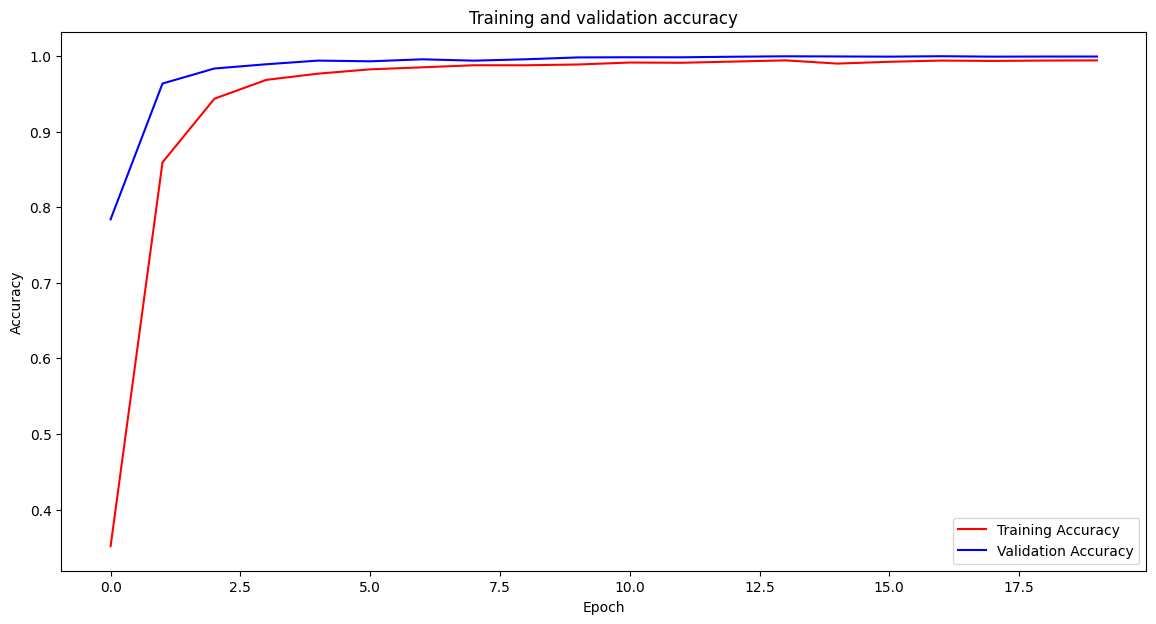

In [10]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

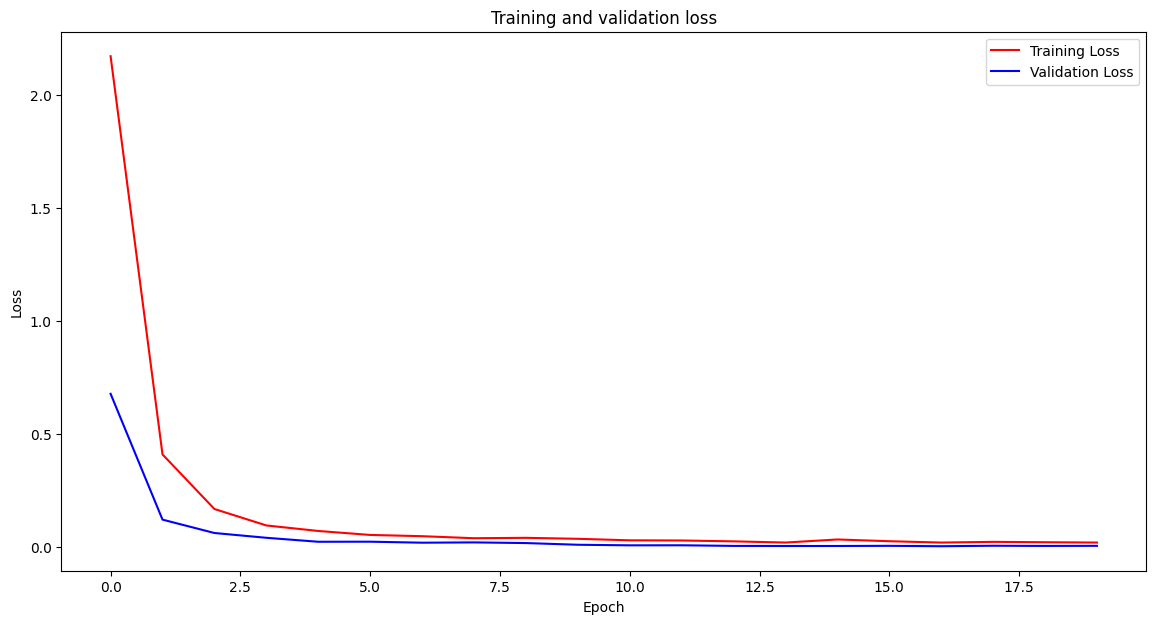

In [11]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

<a id="6"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Prediction</p>

In [12]:
predictions = model.predict(holdout_generator, verbose=1)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1) #multiple categories

true_classes = holdout_generator.classes
class_labels = list(holdout_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

34/34 [==============================] - 56s 2s/step
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       300
           B       1.00      1.00      1.00       300
           C       1.00      1.00      1.00       300
           D       1.00      1.00      1.00       300
           E       1.00      1.00      1.00       300
           F       1.00      1.00      1.00       300
           G       1.00      1.00      1.00       300
           H       1.00      1.00      1.00       300
           I       1.00      1.00      1.00       300
           J       1.00      1.00      1.00       300
           K       0.99      1.00      1.00       300
           L       1.00      1.00      1.00       300
           M       1.00      1.00      1.00       300
           N       1.00      1.00      1.00       300
           O       1.00      1.00      1.00       300
           P       1.00      1.00      1.00       300
           Q       1.00     

In [14]:
model.save('model.h5')

In [17]:
f = open('model2.p', 'wb')
pickle.dump({'model': model}, f)
f.close()